### Importing the required libraries

### https://thinkingneuron.com/boston-housing-price-prediction-case-study-in-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
boston = pd.read_csv("BostonHousingData.csv")

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil/teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [25]:
boston.shape

(506, 14)

In [26]:
print('Shape before deleting duplicate values:', boston.shape)
# Removing duplicate rows if any
BostonData=boston.drop_duplicates()
print('Shape After deleting duplicate values:', BostonData.shape)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


- Target Variable: MEDV
- Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM, etc.

### Distribution of Target variable

<AxesSubplot:>

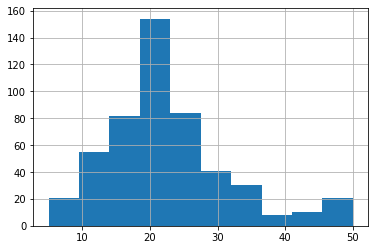

In [29]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
BostonData["MEDV"].hist()

In [30]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [31]:
# Looking at the descriptive statistics of the data
BostonData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

### Basic Data Exploration Results

- CRIM - Continuous. Selected.
- ZN - Continuous. Selected.
- INDUS - Continuous. Selected.
- CHAS - Categorical. Selected.
- NOX - Continuous. Selected.
- RM - Continuous. Selected.
- AGE - Continuous. Selected.
- DIS - Continuous. Selected.
- RAD - Categorical. Selected.
- TAX - Continuous. Selected.
- PTRATIO - Continuous. Selected.
- B - Continuous. Selected.
- LSTAT - Continuous. Selected.
- MEDV - Continuous. Selected. This is the Target Variable!

### Visual Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

- categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values

  Based on the Basic Data Exploration above, we have spotted two categorical predictors in the data

- Categorical Predictors:
   - 'CHAS', 'RAD'

We use bar charts to see how the data is distributed for these categorical columns.

In [41]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

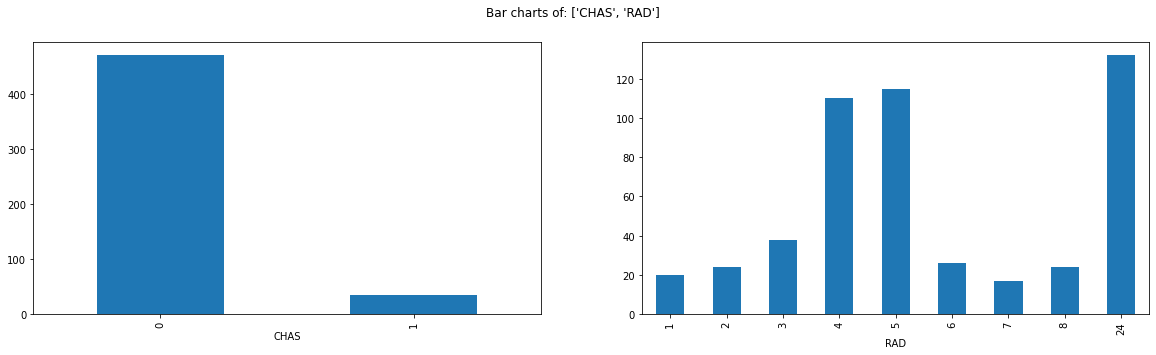

In [42]:
# Calling the function
PlotBarCharts(inpData=BostonData, colsToPlot=['CHAS','RAD'])

In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may   not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the     value is this then the target variable is that. 

Selected Categorical Variables: Both the categorical variables are selected for further analysis.

'CHAS', 'RAD'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, there are eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', and 'LSTAT'.

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

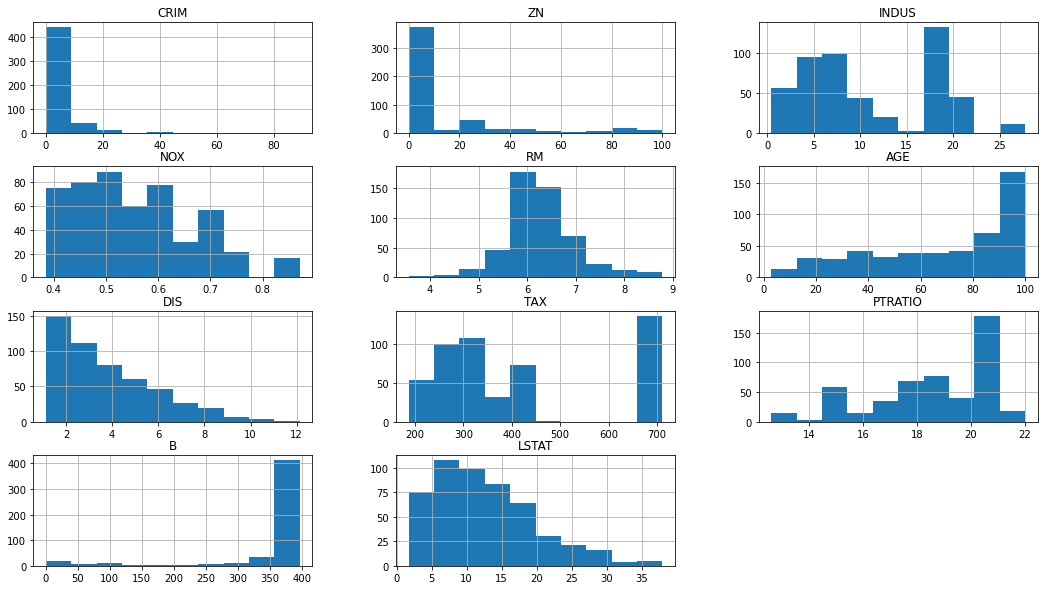

In [43]:
# Plotting histograms of multiple columns together
BostonData.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

### Histogram Interpretation

### Selected Continuous Variables:

- CRIM : Selected. Outliers seen beyond 40, need to treat them.
- ZN : Selected. The distribution is good.
- INDUS : Selected. The distribution is good.
- NOX : Selected. The distribution is good.
- RM : Selected. The distribution is good.
- AGE : Selected. The distribution is good.
- DIS : Selected. The distribution is good.
- TAX : Selected. The distribution is good.
- PTRATIO : Selected. The distribution is good.
- B: Selected. The distribution is good.
- LSTAT: Selected. The distribution is good.

### Outlier treatment

#### There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'CRIM'

In [44]:
# Finding nearest values to 60 mark
BostonData['CRIM'][BostonData['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

Above result shows the nearest logical value is 51.13, hence, replacing any value above 60 with it.

In [45]:
# Replacing outliers with nearest possibe value
BostonData['CRIM'][BostonData['CRIM']>60] =51.13

C:\Users\Aswinjoseph\AppData\Local\Temp\ipykernel_17572\2202620496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BostonData['CRIM'][BostonData['CRIM']>60] =51.13


### Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

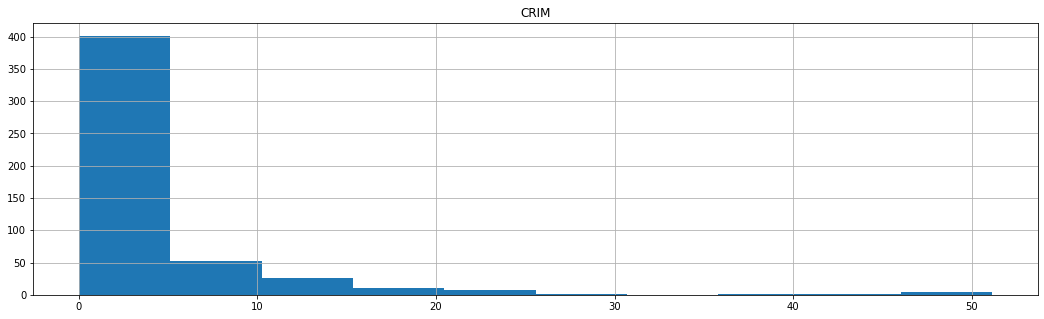

In [46]:
BostonData.hist(['CRIM'], figsize=(18,5))

### Missing values treatment

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [47]:
# Finding how many missing values are there for each column
BostonData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Feature Selection

### Relationship exploration (Continuous Vs Continuous)

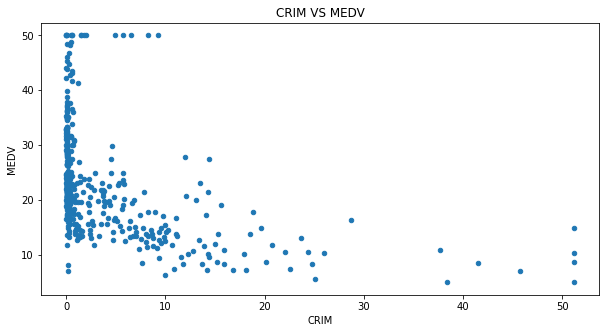

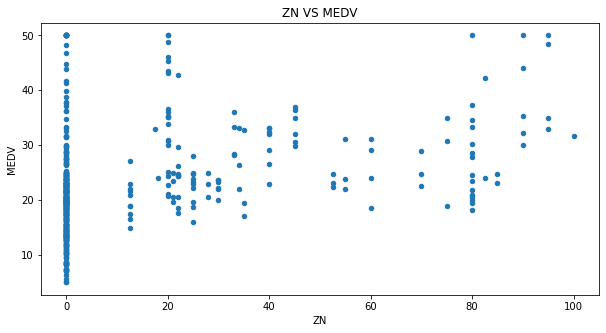

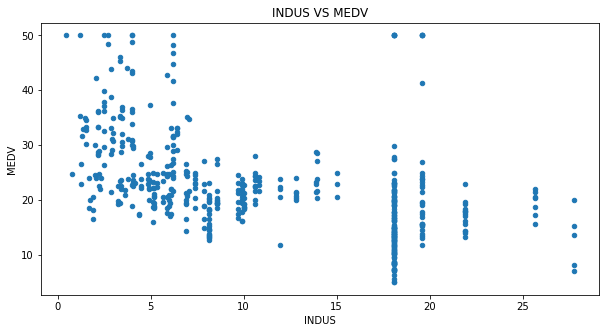

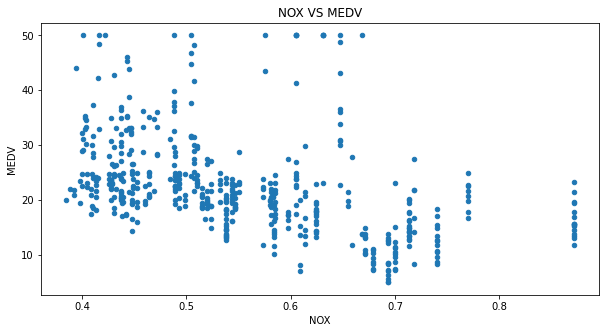

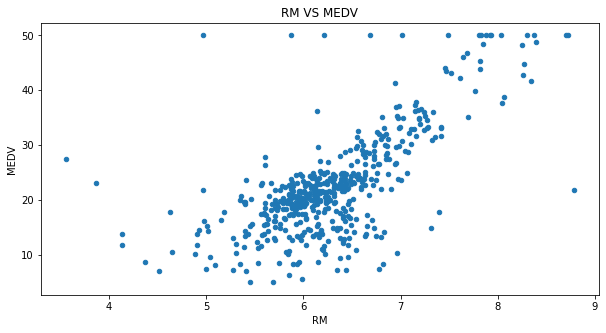

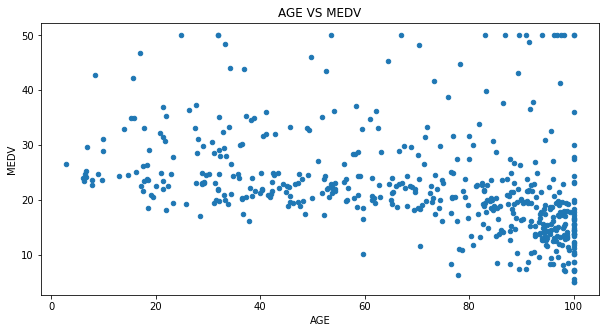

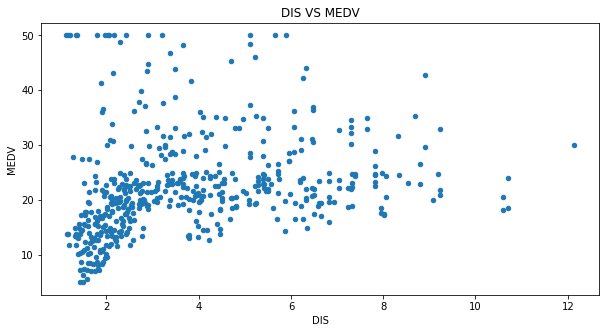

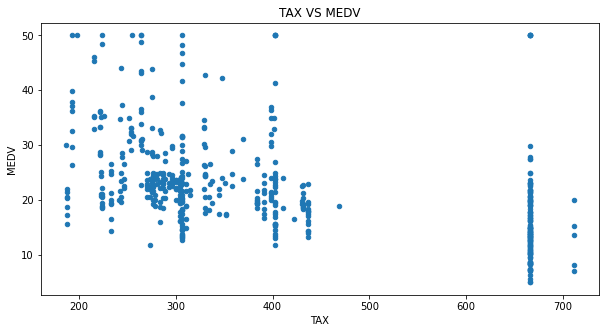

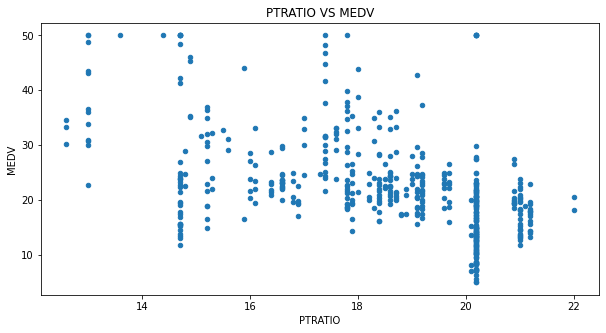

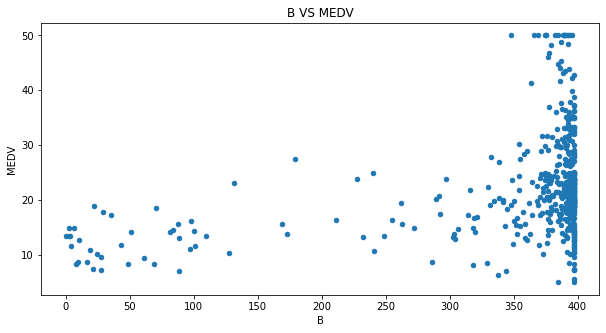

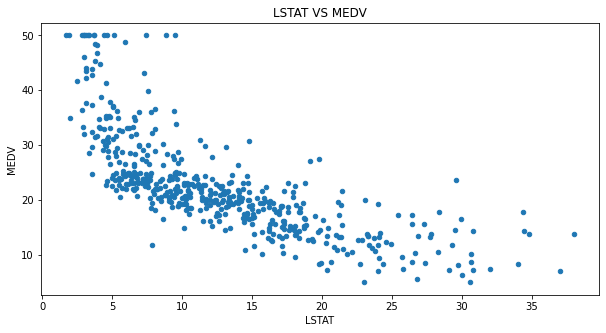

In [48]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonData.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

Scatter charts interpretation


Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

### Statistical Feature Selection

Pearson's correlation coefficient can simply be calculated as the covariance between two features  x  and  y  (numerator) divided by the product of their standard deviations (denominator):

### 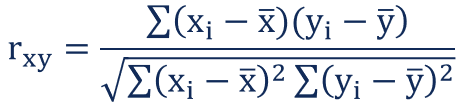

If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship

In [51]:
# Calculating correlation matrix
ContinuousCols=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Creating the correlation matrix
CorrelationData=BostonData[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419265,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419265,1.000000,-0.222332,0.450375,0.466020,-0.257310,0.388784,-0.417941,0.643998,0.319489,-0.429858,0.508483
ZN,0.360445,-0.222332,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450375,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466020,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257310,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417941,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643998,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319489,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [52]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['MEDV'][abs(CorrelationData['MEDV']) > 0.5 ]

MEDV       1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Final selected Continuous columns:

'RM', 'PTRATIO','LSTAT'

### Relationship exploration: Categorical Vs Continuous -- Box Plots

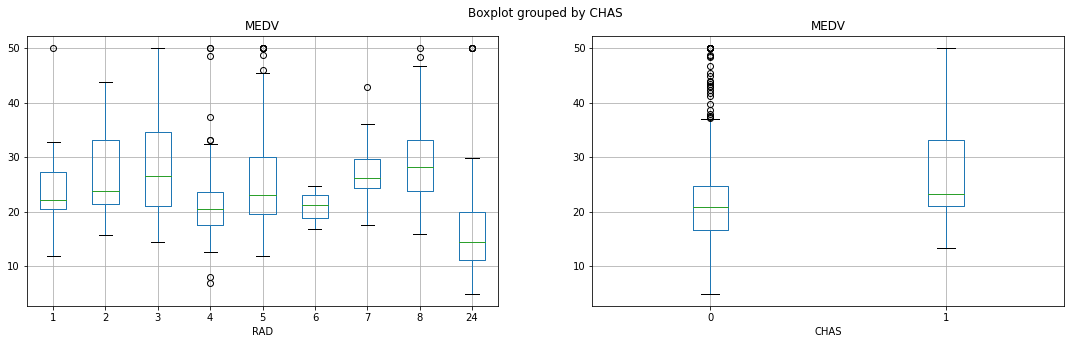

In [53]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['RAD', 'CHAS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
- ANOVA Test result: Probability of H0 being true

In [54]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [55]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAD', 'CHAS']
FunctionAnova(inpData=BostonData, 
              TargetVariable='MEDV', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05


['RAD', 'CHAS']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'RAD', 'CHAS'

### Selecting final predictors for Machine Learning

In [56]:
SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'CHAS']

# Selecting final columns
DataForML=BostonData[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1,0
1,6.421,17.8,9.14,2,0
2,7.185,17.8,4.03,2,0
3,6.998,18.7,2.94,3,0
4,7.147,18.7,5.33,3,0


In [57]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### Converting the nominal variable to numeric using get_dummies()

In [58]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['MEDV']=BostonData['MEDV']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1,0,24.0
1,6.421,17.8,9.14,2,0,21.6
2,7.185,17.8,4.03,2,0,34.7
3,6.998,18.7,2.94,3,0,33.4
4,7.147,18.7,5.33,3,0,36.2


### Machine Learning: Splitting the data into Training and Testing sample

In [59]:
# Printing all the column names for  reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'MEDV'], dtype='object')

In [60]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Standardization/Normalization of data

In [61]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


### Multiple Linear Regression

In [63]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.6980461431155771

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           27.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           35.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           25.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           18.0
Mean Accuracy on test data: 81.80618534324392
Median Accuracy on test data: 88.88888888888889

Accuracy values for 10-fold Cross Validation:
 [88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]

Final Average Accuracy of the model: 78.98


### Decision Trees

DecisionTreeRegressor(criterion='mse', max_depth=5)
R2 Value: 0.900709602721074

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           30.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           25.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           16.0
Mean Accuracy on test data: 84.90486272960791
Median Accuracy on test data: 89.73677103027029

Accuracy values for 10-fold Cross Validation:
 [85.70291249 91.67430612 87.77262804 86.87328743 88.14917801 88.81654498
 88.56381116 60.06188525 74.27758535 73.54170234]

Final Average Accuracy of the model: 82.54


C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-pack

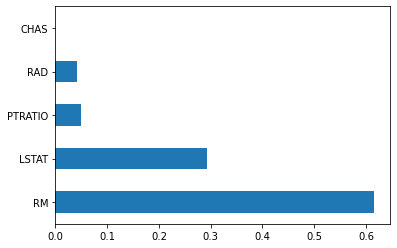

In [64]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [66]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Aswinjoseph\\anaconda3\\Library\\bin\\graphviz'

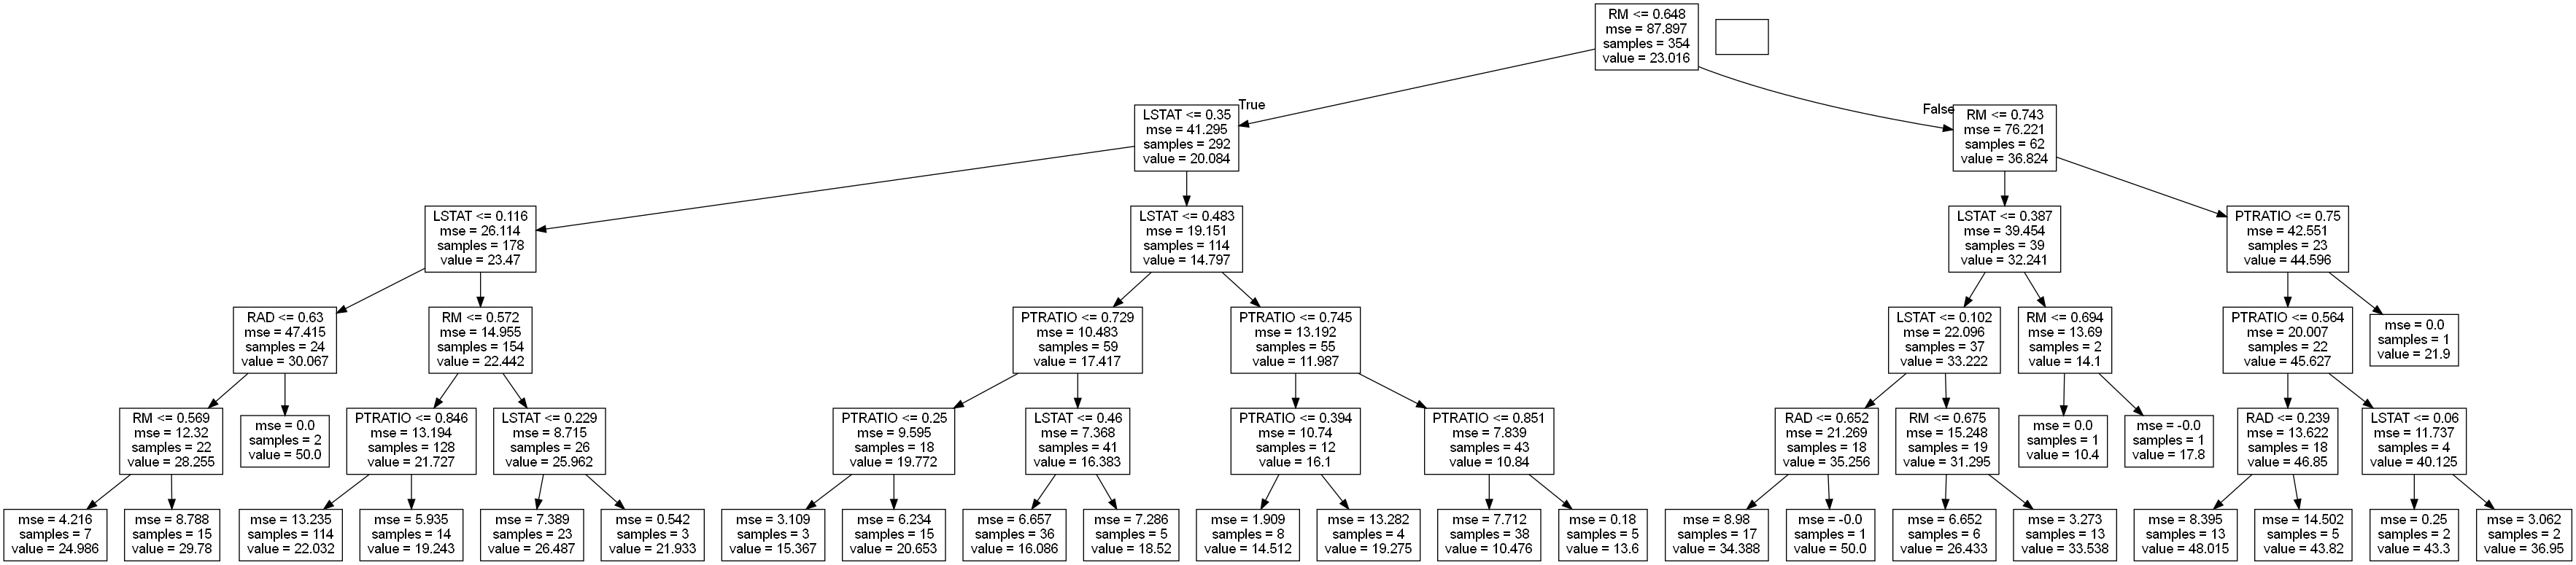

In [67]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


### Random Forest

RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=400)


C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2 Value: 0.8940502671625388

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           33.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           17.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           24.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           16.0
Mean Accuracy on test data: 86.09267338958577
Median Accuracy on test data: 91.46498179481688


C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Aswinjoseph\anaconda3\lib\site-packages\sklearn\ensemble\_f


Accuracy values for 10-fold Cross Validation:
 [88.87999225 93.0927582  86.88697028 88.11752547 88.69851478 90.04992671
 86.33870569 61.94198537 73.2765883  80.27618721]

Final Average Accuracy of the model: 83.76


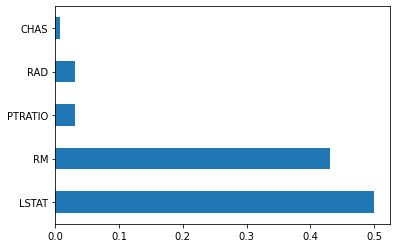

In [68]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting one of the Decision Trees in Random Forest

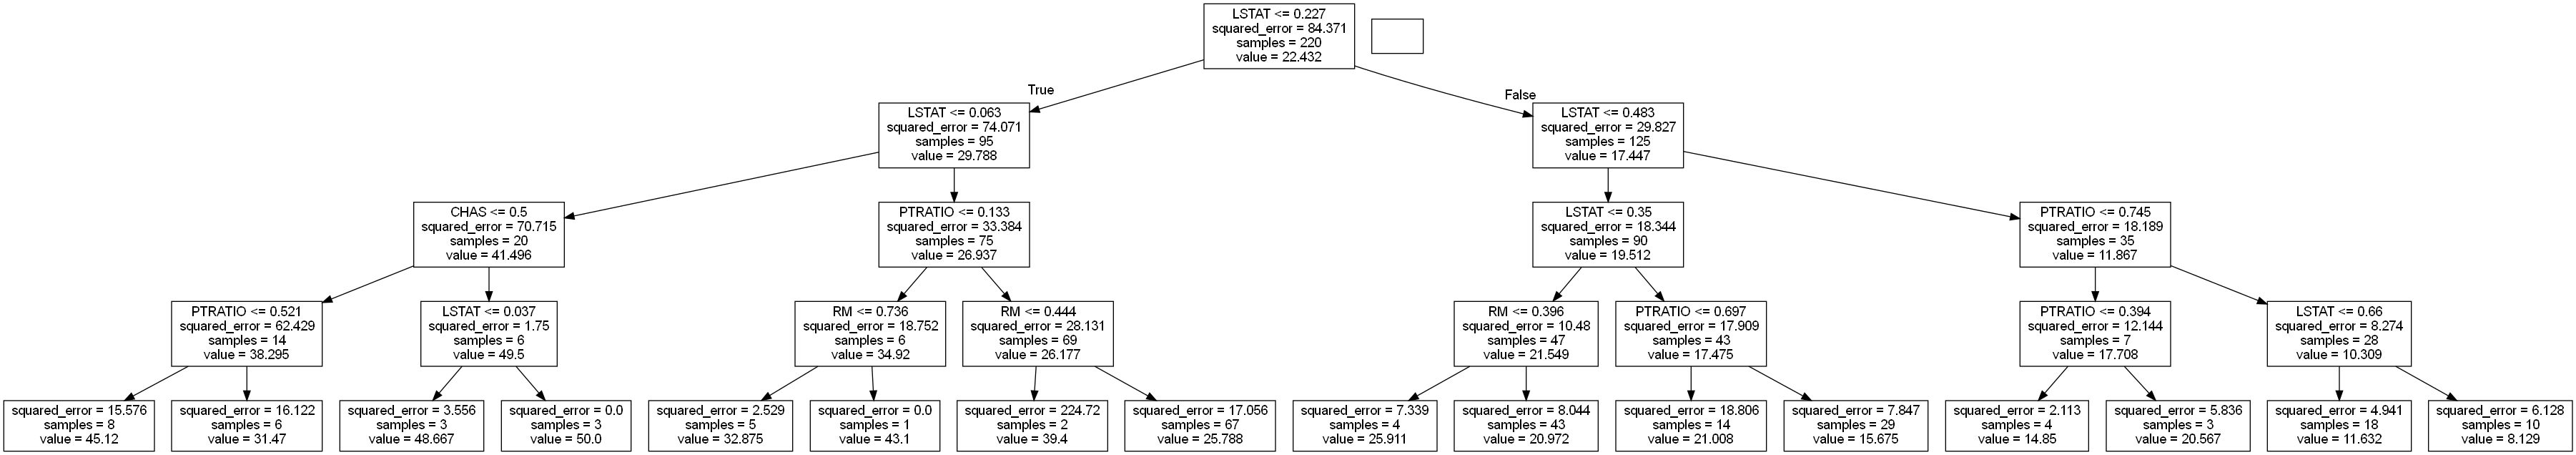

In [69]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

### AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.8709031454359436

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           33.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           17.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           27.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           17.0
Mean Accuracy on test data: 82.90782784718924
Median Accuracy on test data: 87.84305161243358

Accuracy values for 10-fold Cross Validation:
 [87.14817321 88.21900257 87.48040564 86.57687485 87.01229198 85.8984654
 79.96607224 57.54163028 70.50158207 79.7422929 ]

Final Average Accuracy of the model: 81.01


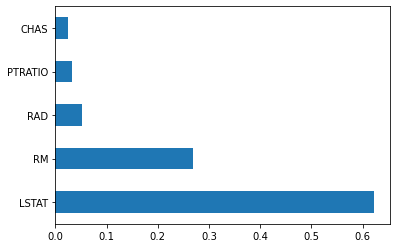

In [70]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### XGBoost

C:\Users\Aswinjoseph\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[18:42:01] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9873657311360539

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD

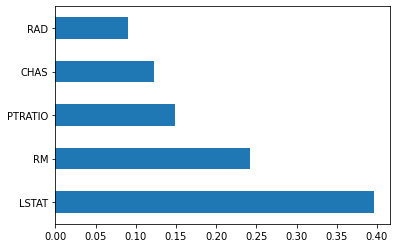

In [72]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### KNN

In [73]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8876178537009081

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           25.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           34.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           23.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           15.0
Mean Accuracy on test data: 85.9476312344639
Median Accuracy on test data: 89.82758620689656

Accuracy values for 10-fold Cross Validation:
 [86.76784363 89.2951359  87.20118045 84.89757598 86.22512671 89.58047045
 88.19801647 61.55065249 75.95669044 78.49115516]

Final Average Accuracy of the model: 82.82


### Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGboost as the final model it has the highest accuracy!

### Choosing only the most important variables¶
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [74]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['LSTAT', 'RM', 'PTRATIO']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(506, 3)
(506,)


### Cross validating the final model accuracy with less predictors

In [75]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[18:46:00] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:01] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:02] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:04] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:04] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:05] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:06] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [76]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

[18:46:33] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


Save the model as a serialized file which can be stored anywhere

In [77]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Aswinjoseph\Documents\FORD


In [78]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['LSTAT', 'RM', 'PTRATIO']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [79]:
# Calling the function 
NewSampleData=pd.DataFrame(
data=[[4.98,6.575,15.3],
     [4.98,3.2,10.3]],
columns=['LSTAT', 'RM', 'PTRATIO'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   4.98  3.200     10.3


C:\Users\Aswinjoseph\AppData\Local\Temp\ipykernel_17572\4097710351.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  InputData=InputData.append(DataForML)


,Prediction
0,25.846903
1,23.979792


### Deploying a predictive model as an API

 Function for predictions API

In [87]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_LSTAT , inp_RM, inp_PTRATIO):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_LSTAT , inp_RM, inp_PTRATIO]],
     columns=['LSTAT', 'RM', 'PTRATIO'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_LSTAT=4.9,
                           inp_RM=6.5,
                           inp_PTRATIO=15.3
                             )

C:\Users\Aswinjoseph\AppData\Local\Temp\ipykernel_17572\4097710351.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  InputData=InputData.append(DataForML)


'{"Prediction":{"0":31.9741382599}}'

In [81]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [82]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        LSTAT_value = float(request.args.get('LSTAT'))
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_LSTAT=LSTAT_value,
                                                       inp_RM=RM_value,
                                                       inp_PTRATIO=PTRATIO_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [83]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
